# 導入套件

### [中選會 資料下載](https://vote2024.cec.gov.tw/zh-TW/indexP0.html)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # 中文輸出(台北黑體)

In [2]:
# Presient2024
# Presient2024.to_pickle('./Presient2024.pklz
Presient2024 = pd.read_pickle('./Presient2024.pkl')

In [3]:
City_lst = ['臺北市', '新北市', '臺中市', '臺南市', '高雄市', '基隆市', '桃園市', '新竹市', '新竹縣', '苗栗縣', '南投縣', '彰化縣', '雲林縣', '嘉義市', '嘉義縣', '屏東縣',  '宜蘭縣', '花蓮縣', '臺東縣', '澎湖縣', '連江縣', '金門縣']
presient24 = Presient2024.iloc[:, -3:].groupby('City').sum().loc[City_lst].copy()
presient24.columns = ['柯盈', '賴蕭', '侯康']
c_lst = ['#28C8C8', '#1B9431', '#000095'] # 色碼

display(presient24)

,柯盈,賴蕭,侯康
City,,,
臺北市,366854,587899,587258
新北市,645105,948818,864557
臺中市,513025,641622,552556
臺南市,262560,570811,286867
高雄市,358096,800390,478476
基隆市,58195,76079,84507
桃園市,413528,476441,460823
新竹市,91384,92679,82326
新竹縣,120985,93309,126016


In [4]:
arr = presient24.values.T
arr = arr / arr.sum(0) * 100
arr.shape

(3, 22)

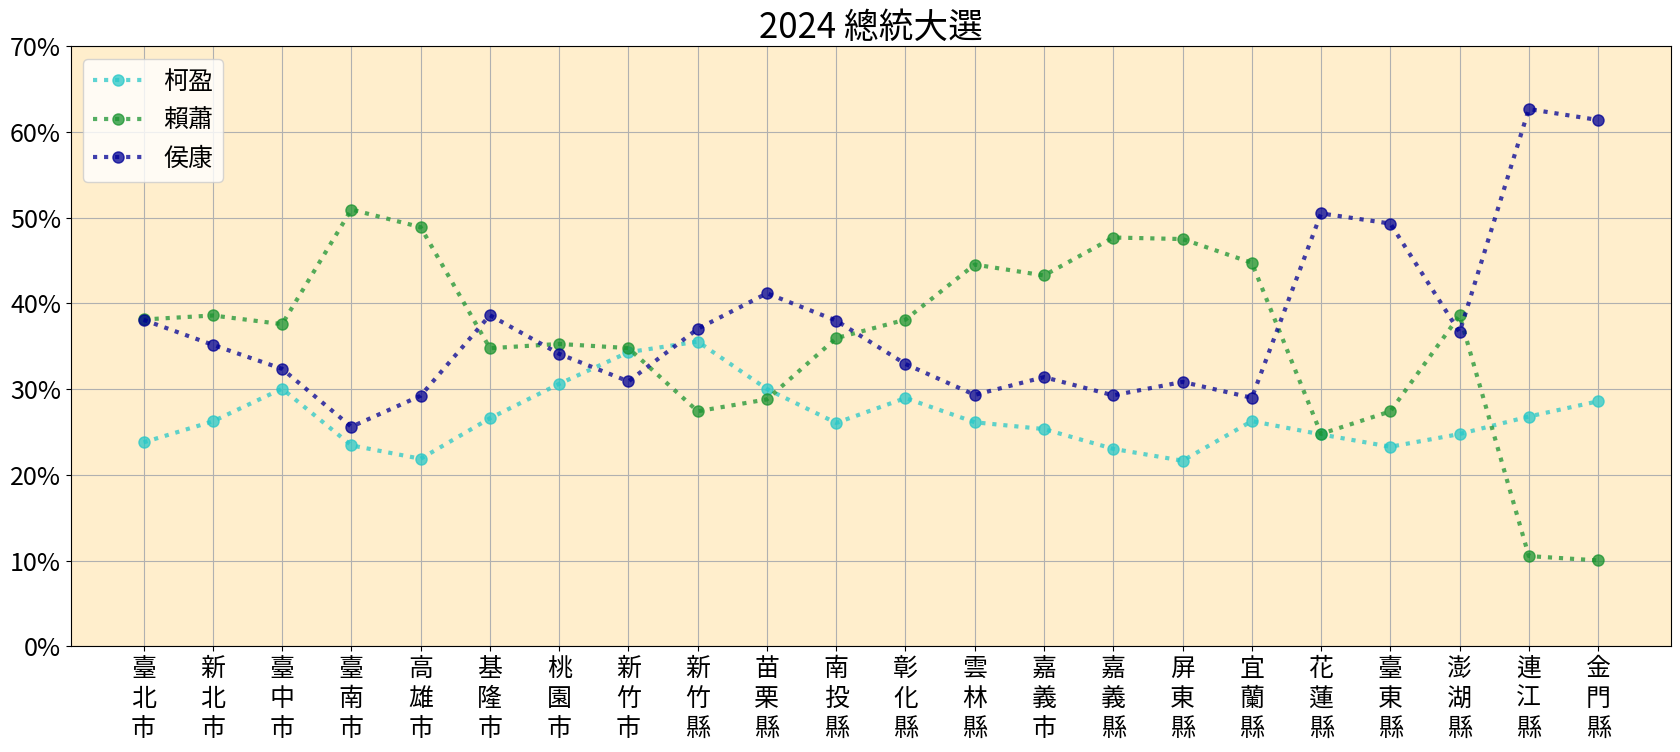

In [5]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=presient24.columns[i])
    
xticks = list(presient24.index.str[-3]  + '\n' + presient24.index.str[-2] + '\n' + presient24.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 71, 10), [str(s)+'%' for s in range(0, 71, 10)], fontsize=18)
plt.ylim([0, 70])
plt.title('2024 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)

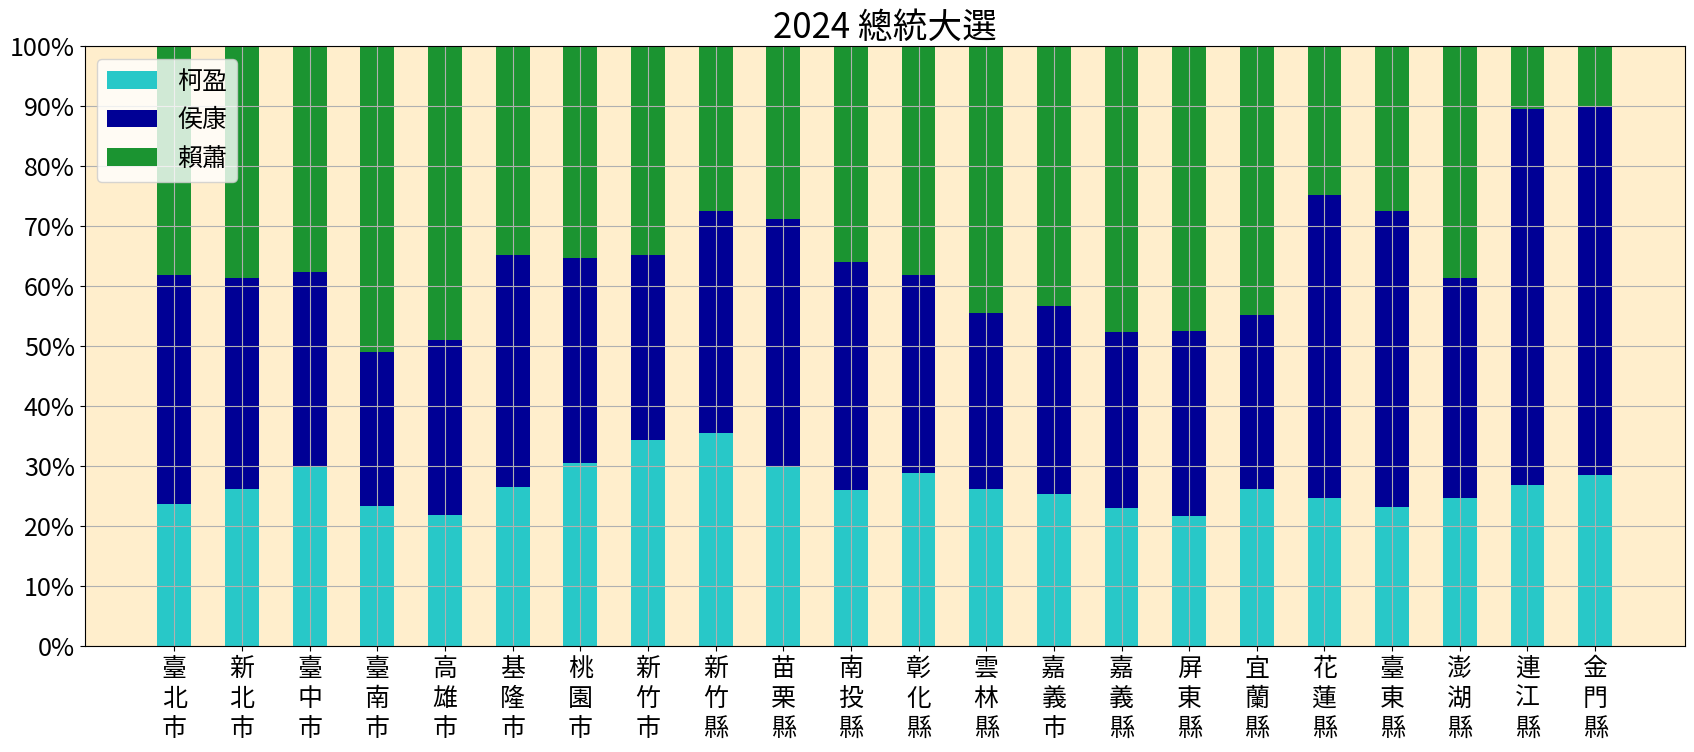

In [6]:
sort = [0, 2, 1] # 重新排列政黨
arrsort = arr[sort]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.bar(np.arange(22), arr[sort[i]], 0.5,  yerr=np.zeros(22), color=c_lst[sort[i]],  bottom=arrsort[0:i, :].sum(0), label=presient24.columns[sort[i]])
 
xticks = list(presient24.index.str[-3]  + '\n' + presient24.index.str[-2] + '\n' + presient24.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 101, 10), [str(s)+'%' for s in range(0, 101, 10)], fontsize=18)
plt.ylim([0, 100])
plt.title('2024 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)

### 2020

In [7]:
presient20 = pd.read_pickle('./Presient2020.pkl').loc[City_lst]
c_lst = ['#ff6310', '#000095', '#1b9431'] # 色碼

display(presient20)

,宋,韓,蔡
City,,,
臺北市,70769,685830,875854
新北市,112620,959631,1393936
臺中市,84800,646366,967304
臺南市,41075,339702,786471
高雄市,55309,610896,1097621
基隆市,11878,99360,114966
桃園市,63132,529749,718260
新竹市,14103,102725,144274
新竹縣,18435,154224,152380


In [8]:
arr = presient20.values.T
arr = arr / arr.sum(0) * 100

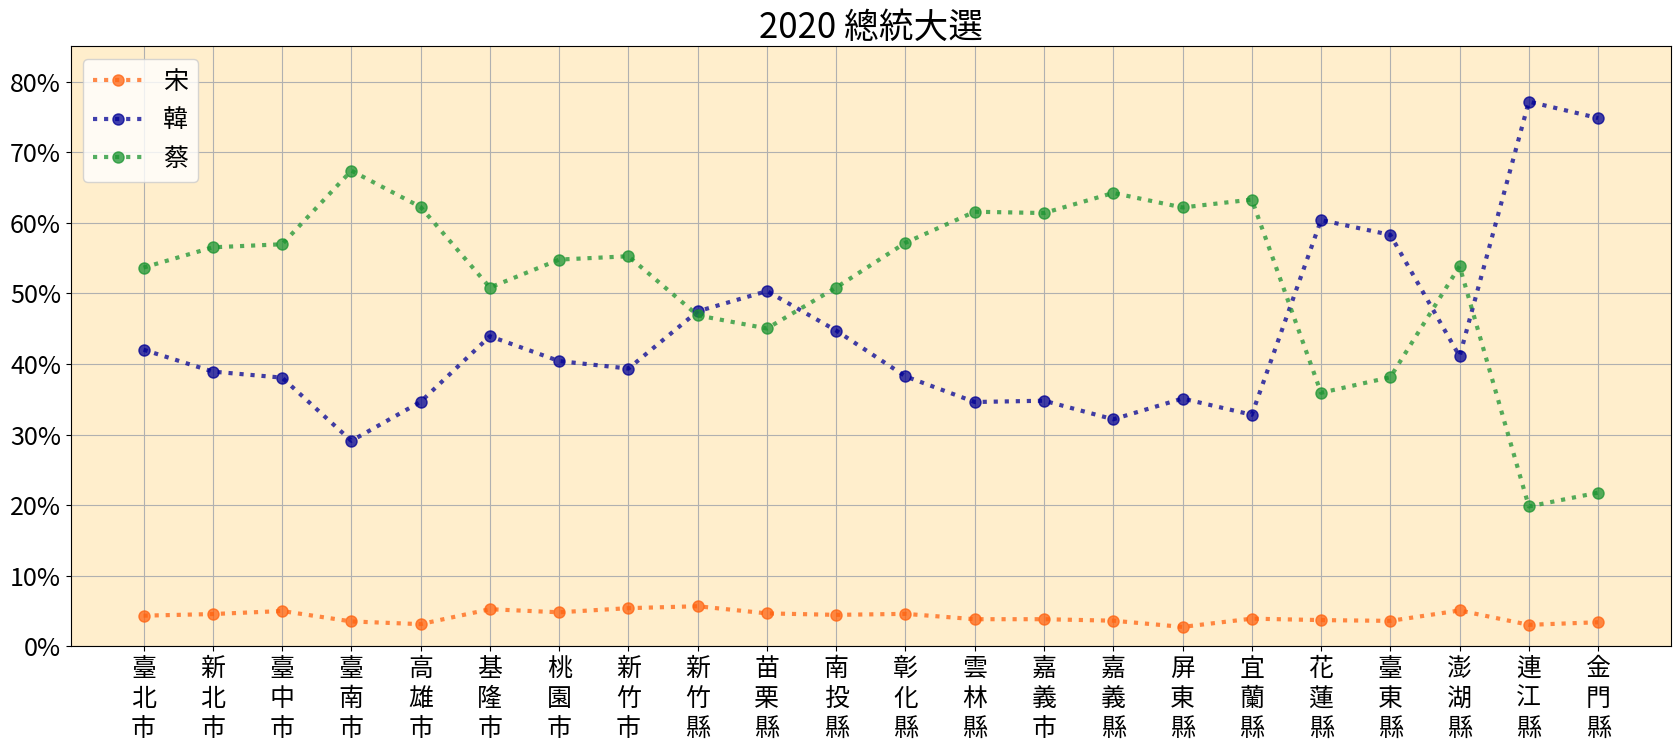

In [9]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=presient20.columns[i])
    
xticks = list(presient20.index.str[-3]  + '\n' + presient20.index.str[-2] + '\n' + presient20.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 81, 10), [str(s)+'%' for s in range(0, 81, 10)], fontsize=18)
plt.ylim([0, 85])
plt.title('2020 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)

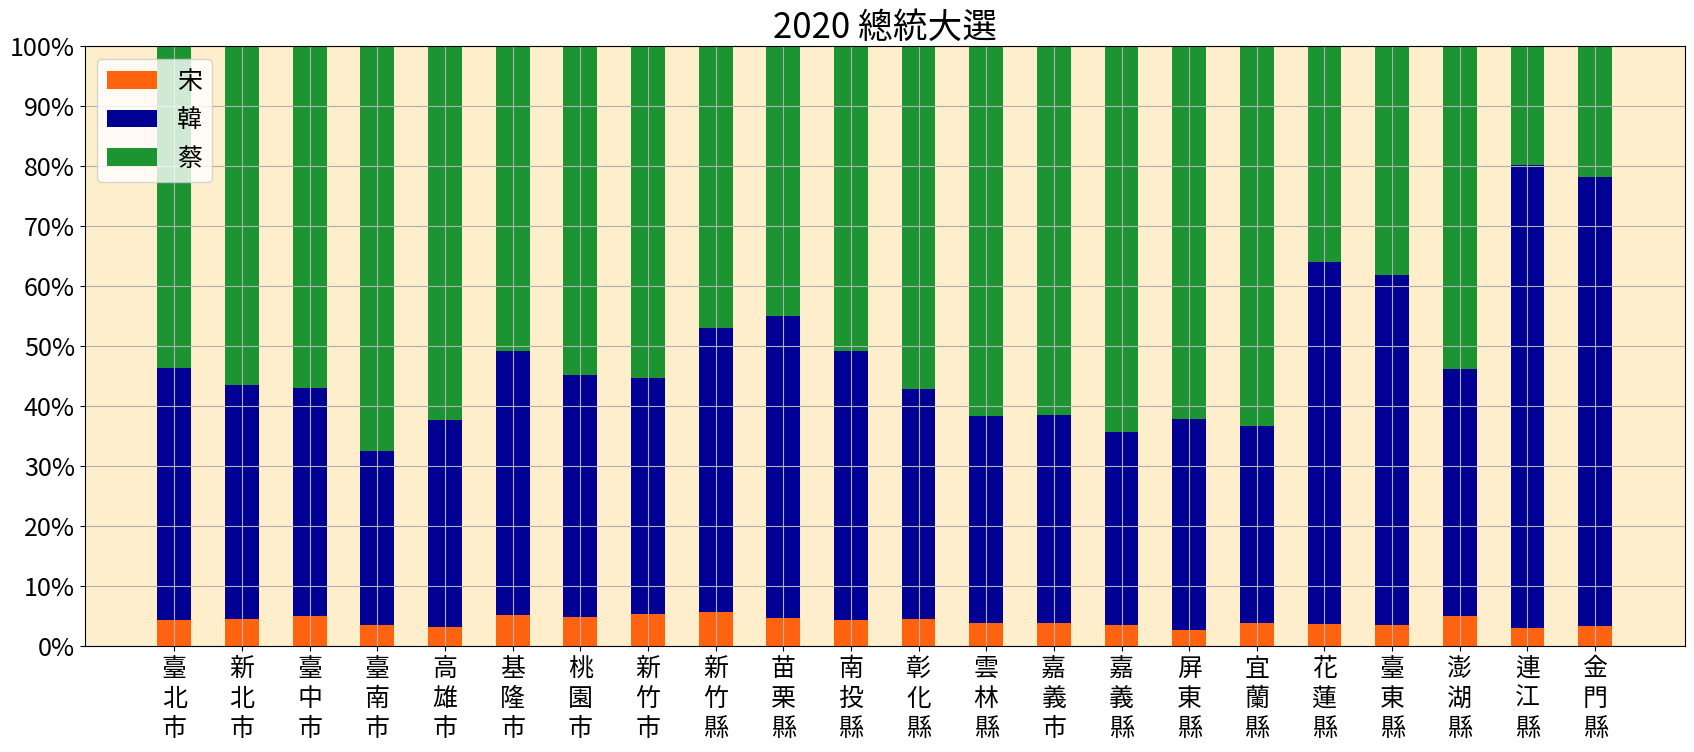

In [10]:
sort = [0, 1, 2] # 重新排列政黨
arrsort = arr[sort]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.bar(np.arange(22), arr[sort[i]], 0.5,  yerr=np.zeros(22), color=c_lst[sort[i]],  bottom=arrsort[0:i, :].sum(0), label=presient20.columns[sort[i]])
 
xticks = list(presient20.index.str[-3]  + '\n' + presient20.index.str[-2] + '\n' + presient20.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 101, 10), [str(s)+'%' for s in range(0, 101, 10)], fontsize=18)
plt.ylim([0, 100])
plt.title('2020 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)